# Регрессионный анализ

## Библиотеки

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

from patsy.contrasts import Treatment
from patsy.contrasts import Sum

$$
\mathbf{y}=\mathbf{X}\mathbf{w} + \varepsilon,
\quad \varepsilon \sim N\bigr(0, \sigma\bigr)
$$

## Warmup

### Данные

In [2]:
rs = np.random.RandomState(42)
X = rs.randn(1000, 2)
w = np.array([1, 1])
y = np.dot(X, w) + rs.randn(1000) * 0.1
noise = rs.randn(1000)

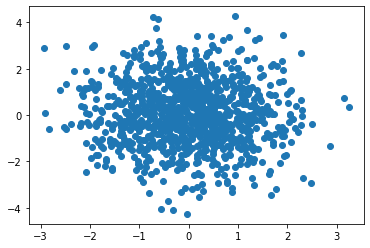

In [3]:
plt.scatter(noise, y)
plt.show()

**Шум с целевой переменной никак не коррелирует — это хорошо (потому что облачко)!**

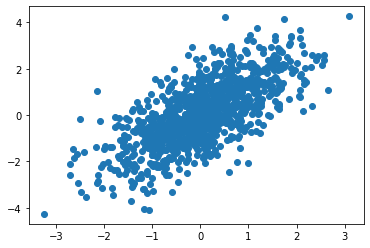

In [4]:
plt.scatter(X[:, 0], y)
plt.show()

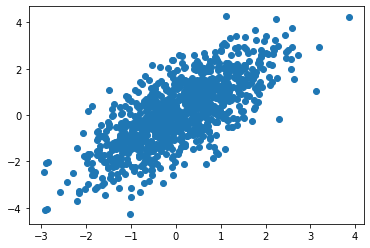

In [6]:
plt.scatter(X[:, 1], y)
plt.show()

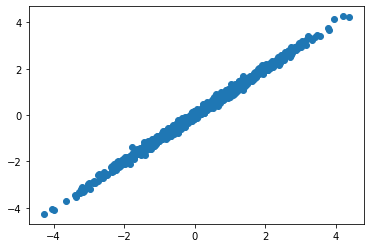

In [7]:
plt.scatter(np.sum(X, 1), y)
plt.show()

### Линейная регрессия

#### Модель без шума из одного признака

##### Инициализация через аргументы

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
simple_model = OLS(y, X[:, 0]).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.473
Method:                 Least Squares   F-statistic:                              897.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                   3.61e-141
Time:                        22:35:22   Log-Likelihood:                         -1441.2
No. Observations:                1000   AIC:                                      2884.
Df Residuals:                     999   BIC:                                      2889.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0076      0.034     29.951      0.000       0.942       1.074
==============================================================================
Omnibus:                        0.786   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.717
Skew:                           0.064   Prob(JB):                        0.699
Kurtosis:                       3.033   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Инициализация через формулы

In [15]:
simple_model = OLS.from_formula('y ~ x1 - 1', {'y' : y, 'x1' : X[:, 0]}).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.473
Method:                 Least Squares   F-statistic:                              897.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                   3.61e-141
Time:                        22:41:05   Log-Likelihood:                         -1441.2
No. Observations:                1000   AIC:                                      2884.
Df Residuals:                     999   BIC:                                      2889.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0076      0.034     29.951      0.000       0.942       1.074
==============================================================================
Omnibus:                        0.786   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.717
Skew:                           0.064   Prob(JB):                        0.699
Kurtosis:                       3.033   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Модель шума

In [16]:
noise_model = OLS(y, noise).fit()
noise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              2.555
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.110
Time:                        22:45:18   Log-Likelihood:                         -1760.3
No. Observations:                1000   AIC:                                      3523.
Df Residuals:                     999   BIC:                                      3528.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0693      0.043     -1.599      0.110      -0.154       0.016
==============================================================================
Omnibus:                        0.224   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.307
Skew:                          -0.013   Prob(JB):                        0.858
Kurtosis:                       2.918   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Модель без шума из двух признаков

In [17]:
complex_model = OLS.from_formula('y ~ x1 + x2 - 1', {'y' :  y, 'x1' : X[:, 0], 'x2' : X[:, 1]}).fit()
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.021e+05
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:45:19   Log-Likelihood:                          901.35
No. Observations:                1000   AIC:                                     -1799.
Df Residuals:                     998   BIC:                                     -1789.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0028      0.003    310.097      0.000       0.996       1.009
x2             1.0017      0.003    327.279      0.000       0.996       1.008
==============================================================================
Omnibus:                        1.796   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.687
Skew:                           0.059   Prob(JB):                        0.430
Kurtosis:                       3.163   Cond. No.                         1.06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Сравнение вложенных моделей
Каждый тест возвращает:

- значение статистики (так как, мы исследуем важность только одного признака, F-критерий эквивалентен критерию Стьюдента для двусторонней альтернативы)
- p-value
- разница в количестве степеней свободы между моделями

##### Критерий Фишера

2 значение: $p-value$

In [19]:
complex_model.compare_f_test(simple_model)

(107111.58988818807, 0.0, 1.0)

##### Критерий отношения правдоподобия ($H_0$: равенство правдоподобий двух моделей)

In [20]:
complex_model.compare_lr_test(simple_model)

(4685.147436500283, 0.0, 1.0)

##### Критерий Бройша-Пагана (множителей Лагранжа)

In [23]:
complex_model.compare_lm_test(simple_model)

(990.768626529502, 1.8232365811007516e-217, 1.0)

Нулевая гипотеза об отсутствии влияния второго признака на целевую переменную отвергается

#### Добавим шум

In [26]:
complex_model2 = OLS.from_formula('y ~ x1 + x2 + noise - 1',
                                  {
                                      'y' : y,
                                      'noise' : noise,
                                      'x1' : X[:, 0],
                                      'x2' : X[:, 1]
                                  }).fit()
complex_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          6.803e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:53:01   Log-Likelihood:                          901.62
No. Observations:                1000   AIC:                                     -1797.
Df Residuals:                     997   BIC:                                     -1783.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0029      0.003    309.592      0.000       0.997       1.009
x2             1.0018      0.003    327.157      0.000       0.996       1.008
noise          0.0022      0.003      0.739      0.460      -0.004       0.008
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.846
Skew:                           0.064   Prob(JB):                        0.397
Kurtosis:                       3.168   Cond. No.                         1.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Нулевая гипотеза**: каждый отдельный коэффициент можно занулить (он неважен).

$p-value$ для шума $\ge 0.05 \rightarrow$ данные не противоречат гипотезе, шум можно занулить.

In [25]:
complex_model2.compare_lm_test(complex_model)

/home/hp/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:2086: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = wexog * wresid[:, None]


(0.5472289805515435, 0.45945214681803137, 1.0)

In [27]:
complex_model2.compare_lm_test(noise_model)

(995.1264385047211, 8.147783502227811e-217, 2.0)

In [28]:
complex_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          6.803e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:55:33   Log-Likelihood:                          901.62
No. Observations:                1000   AIC:                                     -1797.
Df Residuals:                     997   BIC:                                     -1783.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0029      0.003    309.592      0.000       0.997       1.009
x2             1.0018      0.003    327.157      0.000       0.996       1.008
noise          0.0022      0.003      0.739      0.460      -0.004       0.008
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.846
Skew:                           0.064   Prob(JB):                        0.397
Kurtosis:                       3.168   Cond. No.                         1.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.021e+05
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:55:34   Log-Likelihood:                          901.35
No. Observations:                1000   AIC:                                     -1799.
Df Residuals:                     998   BIC:                                     -1789.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0028      0.003    310.097      0.000       0.996       1.009
x2             1.0017      0.003    327.279      0.000       0.996       1.008
==============================================================================
Omnibus:                        1.796   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.687
Skew:                           0.059   Prob(JB):                        0.430
Kurtosis:                       3.163   Cond. No.                         1.06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
noise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              2.555
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.110
Time:                        22:55:37   Log-Likelihood:                         -1760.3
No. Observations:                1000   AIC:                                      3523.
Df Residuals:                     999   BIC:                                      3528.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0693      0.043     -1.599      0.110      -0.154       0.016
==============================================================================
Omnibus:                        0.224   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.307
Skew:                          -0.013   Prob(JB):                        0.858
Kurtosis:                       2.918   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Выбор моделей: случай невложенных моделей

In [3]:
rs = np.random.RandomState(42)
X = rs.randn(100)
y = X**2 + rs.randn(100) * 0.1

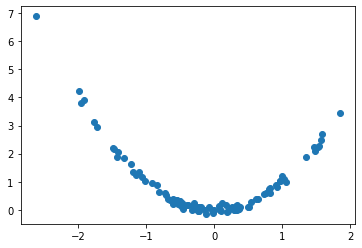

In [4]:
plt.scatter(X, y)
plt.show()

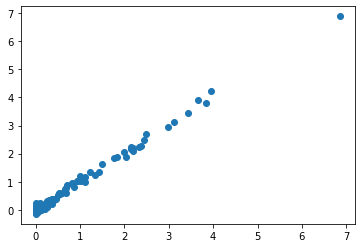

In [5]:
plt.scatter(X ** 2, y)
plt.show()

#### Линейная модель

In [9]:
model1 = OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.092
Model:                            OLS   Adj. R-squared (uncentered):              0.083
Method:                 Least Squares   F-statistic:                              10.03
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                     0.00205
Time:                        14:13:43   Log-Likelihood:                         -173.43
No. Observations:                 100   AIC:                                      348.9
Df Residuals:                      99   BIC:                                      351.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4796      0.151     -3.166      0.002      -0.780      -0.179
==============================================================================
Omnibus:                       45.223   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.042
Skew:                           1.808   Prob(JB):                     5.13e-22
Kurtosis:                       6.233   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Квадратичная модель

In [10]:
model2 = OLS(y, X ** 2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.370e+04
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                   1.11e-119
Time:                        14:13:44   Log-Likelihood:                          95.875
No. Observations:                 100   AIC:                                     -189.7
Df Residuals:                      99   BIC:                                     -187.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0142      0.007    153.962      0.000       1.001       1.027
==============================================================================
Omnibus:                        1.990   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                2.008
Skew:                           0.295   Prob(JB):                        0.366
Kurtosis:                       2.636   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Качество модели — параметр $R^2$.**

#### Предсказания моделей

In [11]:
y_predicted1 = model1.predict(X)
y_predicted2 = model2.predict(X ** 2)

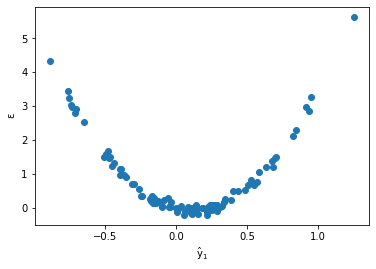

In [14]:
plt.scatter(y_predicted1, y - y_predicted1)
plt.xlabel('$\hat y_1$')
plt.ylabel('$\epsilon$')
_ = plt.show()

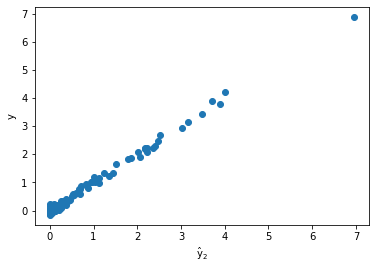

In [15]:
plt.scatter(y_predicted2, y)
plt.xlabel('$\hat y_2$')
plt.ylabel('y')
plt.show()

#### Критерий Давидсона-Маккиннона

In [16]:
data = {'y' : y, 'y1' : y_predicted1, 'y2': y_predicted2, 'X' : X, 'X2' : X ** 2}
model1_with_y_2 = OLS.from_formula('y ~ y2 + X', data=data).fit()
model2_with_y_1 = OLS.from_formula('y ~ y1 + X2', data=data).fit()

In [17]:
model1_with_y_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7901.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          3.91e-108
Time:                        14:14:27   Log-Likelihood:                 96.934
No. Observations:                 100   AIC:                            -187.9
Df Residuals:                      97   BIC:                            -180.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0138      0.012     -1.199      0.233      -0.037       0.009
y2             1.0042      0.008    120.174      0.000       0.988       1.021
X             -0.0076      0.011     -0.703      0.484      -0.029       0.014
==============================================================================
Omnibus:                        2.075   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.910
Skew:                           0.239   Prob(JB):                        0.385
Kurtosis:                       2.521   Cond. No.                         2.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2_with_y_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7901.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          3.91e-108
Time:                        14:14:28   Log-Likelihood:                 96.934
No. Observations:                 100   AIC:                            -187.9
Df Residuals:                      97   BIC:                            -180.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0138      0.012     -1.199      0.233      -0.037       0.009
y1             0.0158      0.022      0.703      0.484      -0.029       0.060
X2             1.0184      0.008    120.174      0.000       1.002       1.035
==============================================================================
Omnibus:                        2.075   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.910
Skew:                           0.239   Prob(JB):                        0.385
Kurtosis:                       2.521   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Кодирование категориальных переменных

In [19]:
rs = np.random.RandomState(42)

data = [1] * 10 + [2] * 7 + [3] * 5
rs.shuffle(data)
data = np.array(data)
data

array([1, 2, 1, 1, 2, 1, 3, 2, 1, 1, 3, 2, 3, 2, 1, 1, 3, 1, 2, 2, 3, 1])

#### dummy

In [20]:
levels = [1, 2, 3]
contrast = Treatment().code_without_intercept(levels)
print(contrast.matrix)

[[0. 0.]
 [1. 0.]
 [0. 1.]]


In [22]:
contrast.matrix[data - 1]

array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.]])

#### deviation

In [23]:
contrast = Sum().code_without_intercept(levels)
print(contrast.matrix)

[[ 1.  0.]
 [ 0.  1.]
 [-1. -1.]]


In [24]:
contrast.matrix[data - 1]

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [-1., -1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1., -1.],
       [ 0.,  1.],
       [-1., -1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1., -1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [-1., -1.],
       [ 1.,  0.]])

### Метод Бокса-Кокса

Переход в логарифмическую шкалу

In [26]:
rs = np.random.RandomState(42)
y = rs.randn(100)
print(np.array(y > 1).sum())

11


#### Изменим хвост нормального распределения

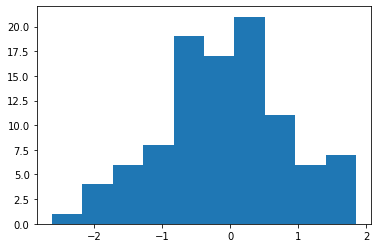

In [27]:
_ = plt.hist(y)
plt.show()

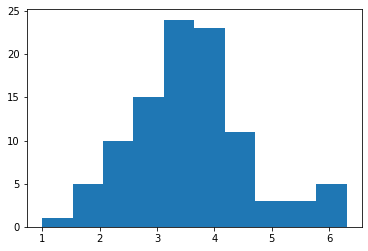

In [28]:
tails = (y) > 1
y[tails] *= 1.45

y = y - np.min(y) + 1
_ = plt.hist(y)
plt.show()

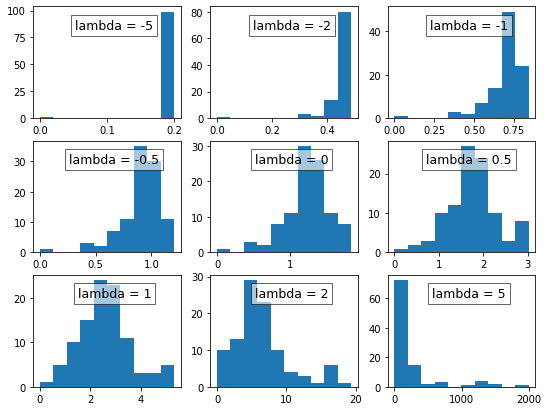

In [29]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
            horizontalalignment='center',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5)
    return ax

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
lambdas = [-5, -2, -1, -0.5, 0, 0.5, 1, 2, 5]
for i, l in enumerate(lambdas):
    axes[i // 3, i % 3].hist(st.boxcox(y, l))
    add_titlebox(axes[i // 3, i % 3], 'lambda = ' + str(l))

In [30]:
for l in np.arange(-2.0,  2.0, 0.1):    
    print("lambda:", l, "p-value:", st.shapiro(st.boxcox(y, l))[1])

lambda: -2.0 p-value: 1.3918920521826514e-16
lambda: -1.9 p-value: 3.914205953106718e-16
lambda: -1.7999999999999998 p-value: 1.176184127205809e-15
lambda: -1.6999999999999997 p-value: 3.779649898995926e-15
lambda: -1.5999999999999996 p-value: 1.2990348000844337e-14
lambda: -1.4999999999999996 p-value: 4.773070976546272e-14
lambda: -1.3999999999999995 p-value: 1.8728607260962843e-13
lambda: -1.2999999999999994 p-value: 7.833421411529429e-13
lambda: -1.1999999999999993 p-value: 3.4833631205183346e-12
lambda: -1.0999999999999992 p-value: 1.6411877065691804e-11
lambda: -0.9999999999999991 p-value: 8.156253450408713e-11
lambda: -0.899999999999999 p-value: 4.252465324317001e-10
lambda: -0.7999999999999989 p-value: 2.310562408069927e-09
lambda: -0.6999999999999988 p-value: 1.2973270457905528e-08
lambda: -0.5999999999999988 p-value: 7.453459005546392e-08
lambda: -0.49999999999999867 p-value: 4.3268505578453187e-07
lambda: -0.3999999999999986 p-value: 2.4999130801006686e-06
lambda: -0.29999999

In [56]:
bc, l = st.boxcox(y)
print(f'optimal lambda = {l}')
print('Box-Cox transformed array:')
print(bc)

optimal lambda = 0.6650524604546766
Box-Cox transformed array:
[2.34967566 1.94339332 2.44309507 3.35216838 1.87995815 1.87996907
 3.39720323 2.51640594 1.72167007 2.37816355 1.72579271 1.72421926
 2.18939193 0.64172332 0.79643666 1.65815816 1.34010116 2.23522256
 1.41563252 1.04230086 3.30595495 1.88552376 2.07759462 1.03274647
 1.67046012 2.10556927 1.23895715 2.2739625  1.63172649 1.84160362
 1.63098887 3.61319828 2.0250636  1.30744761 2.54991976 1.18710261
 2.16831071 0.60275787 1.1064171  2.1606511  2.49873321 2.14435529
 1.95826919 1.8353102  0.99125048 1.5488415  1.72768336 2.97016857
 2.25376379 0.76555632 2.24143736 1.77887738 1.57881497 2.42091346
 2.94826921 2.61563878 1.4646879  1.82988228 2.24597007 2.64224134
 1.71506208 1.91211366 1.27185281 1.20544939 2.54383731 3.21721317
 1.98688198 2.92518453 2.26511521 1.60092878 2.26496386 3.3642179
 2.01051797 3.38554503 0.         2.5495299  2.09019124 1.83671277
 2.09322992 0.57914852 1.88957655 2.26226699 3.31583573 1.68835848


### Гетероскедастичность

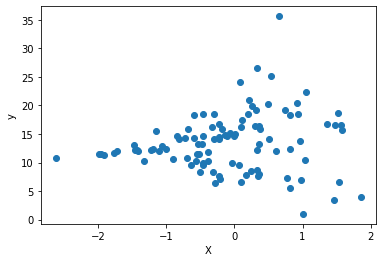

In [57]:
rs = np.random.RandomState(42)
X = rs.randn(100)
X.sort()
error = rs.randn(100) * 0.1 * np.arange(100)
y = X + error
y = y - np.min(y) + 1
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

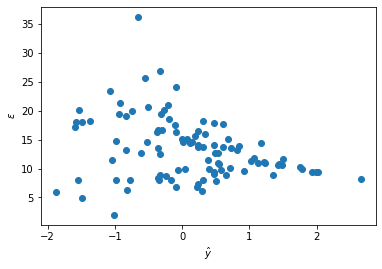

In [58]:
model = OLS(y, X).fit()
predicted = model.predict(X)
plt.scatter(predicted, y - predicted)
plt.xlabel('$\hat y$')
_ = plt.ylabel('$\epsilon$')
plt.show()

### Преобразование Бокса-Кокса вручную

In [59]:
def W(y, lam):
    return np.log(y) if lam == 0 else (y**lam - 1) / lam

In [60]:
for l in [-2, -1, -0.5, 0, 0.5, 1, 2]:
    print(np.sum(W(y, l) - st.boxcox(y, l)))

-5.551115123125783e-17
2.220446049250313e-16
-1.3322676295501878e-15
0.0
-7.105427357601002e-15
-1.509903313490213e-14
-4.760636329592671e-13


35.61563235597085


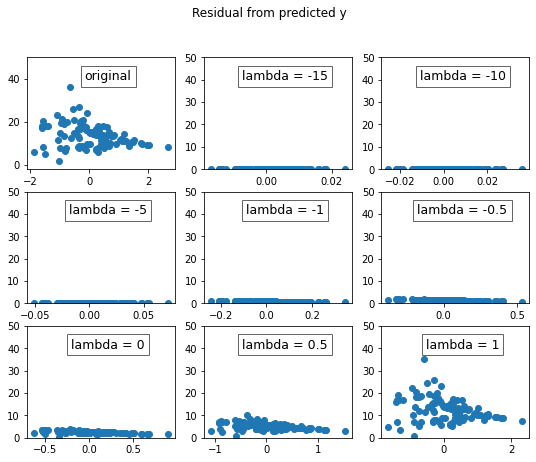

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
fig.suptitle('Residual from predicted y')

model = OLS(y, X).fit()
predicted = model.predict(X)
axes[0, 0].scatter(predicted, y - predicted)
axes[0, 0].set_ylim((-2, 50))
add_titlebox(axes[0, 0], 'original')
print(max(y))
    
lams = [-15, -10, -5, -1, -0.5, 0, 0.5, 1]
for i, l in enumerate(lams):
    i += 1
    model = OLS(W(y, l), X).fit()
    predicted = model.predict(X)
    axes[i // 3, i % 3].scatter(predicted, W(y, l) - predicted)
    add_titlebox(axes[i // 3, i % 3], 'lambda = ' + str(l))
    axes[i // 3, i % 3].set_ylim((0, 50))

-5.0

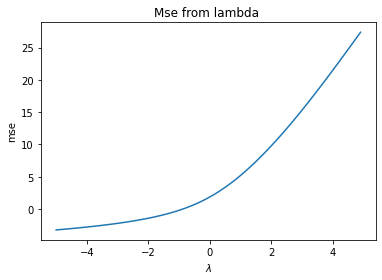

In [62]:
lams = np.arange(-5, 5, 0.1)
r = []
for l in lams:
    model = OLS(W(y, l), X).fit()
    r.append(np.log(model.mse_resid))
plt.plot(lams, r)
plt.xlabel('$\lambda$')
plt.ylabel('mse')
plt.title('Mse from lambda ')
lams[np.argmin(r)]

#### Before

In [63]:
model = OLS(y, X).fit()
print(model.mse_resid)

209.9125220203905


In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.4038
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.527
Time:                        23:31:37   Log-Likelihood:                         -408.73
No. Observations:                 100   AIC:                                      819.5
Df Residuals:                      99   BIC:                                      822.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0122      1.593     -0.635      0.527      -4.173       2.148
==============================================================================
Omnibus:                       24.587   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.563
Skew:                           1.053   Prob(JB):                     1.56e-09
Kurtosis:                       5.302   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### After

In [65]:
bc, l = st.boxcox(y)
model = OLS(bc, X).fit()
print(l, model.mse_resid)

0.6590350588973163 50.53390977431041


In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.7636
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.384
Time:                        23:34:25   Log-Likelihood:                         -337.52
No. Observations:                 100   AIC:                                      677.0
Df Residuals:                      99   BIC:                                      679.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6829      0.782     -0.874      0.384      -2.234       0.868
==============================================================================
Omnibus:                        8.569   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.476
Skew:                           0.587   Prob(JB):                       0.0144
Kurtosis:                       3.809   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model = OLS(W(y, -5), X).fit()
print(model.mse_resid)

0.039362468177660585


In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              1.595
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.210
Time:                        23:34:26   Log-Likelihood:                          20.356
No. Observations:                 100   AIC:                                     -38.71
Df Residuals:                      99   BIC:                                     -36.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0275      0.022     -1.263      0.210      -0.071       0.016
==============================================================================
Omnibus:                       57.296   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.591
Skew:                          -1.737   Prob(JB):                     9.91e-73
Kurtosis:                      11.217   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

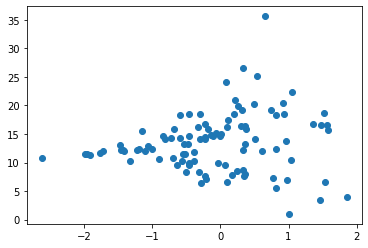

In [70]:
plt.scatter(X, y)
plt.show()

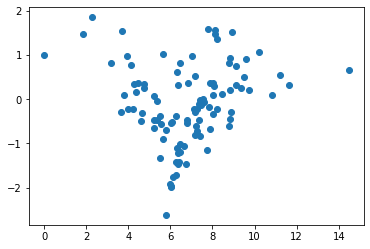

In [71]:
plt.scatter(st.boxcox(y)[0], X)
plt.show()

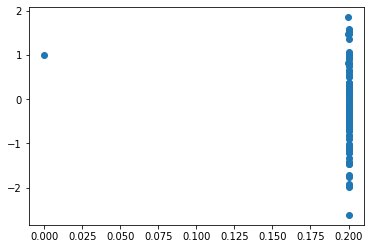

In [72]:
plt.scatter(W(y, -5), X)
plt.show()

## Привлекательность и уровень заработной платы

По 1260 опрошенным имеются следующие данные:

* `wage` - заработная плата за час работы, $;
* `exper` - опыт работы, лет;
* `educ` - образование, лет;
* `looks` - внешняя привлекательность, в баллах от 1 до 5;
* бинарные признаки: 
    * `female` - пол, 
    * `married` - семейное положение, 
    * `goodhlth` - состояние здоровья (хорошее/плохое), 
    * `union` - членство в профсоюзе, 
    * `black` - цвет кожи (белый/чёрный), 
    * `service` - занятость в сфере обслуживания (да/нет).

Требуется оценить влияние внешней привлекательности на уровень заработка с учётом всех остальных факторов.



In [32]:
data = pd.read_csv('data/beauty.csv', delimiter=';')
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


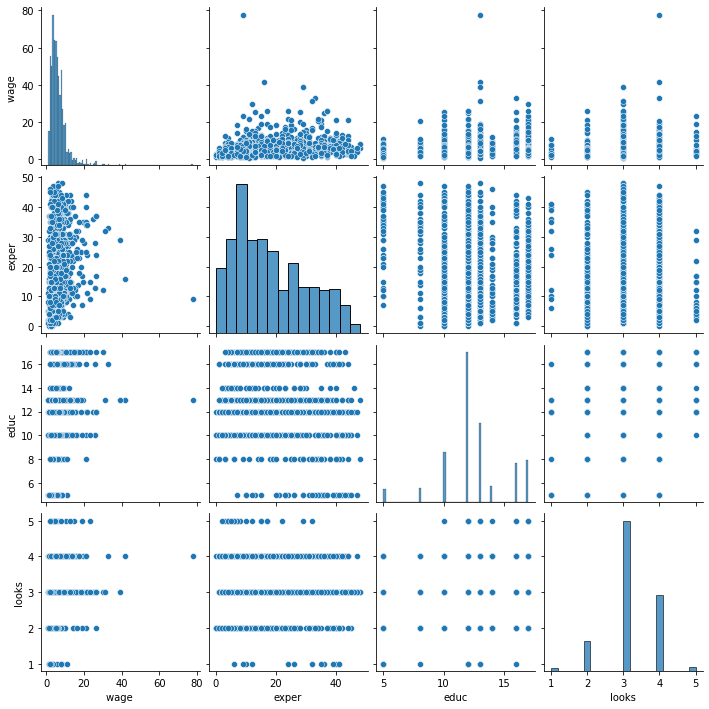

In [33]:
sns.pairplot(data[['wage ', 'exper', 'educ', 'looks']])
plt.show()

### Предобработка

#### Распределение оценок привлекательности: 

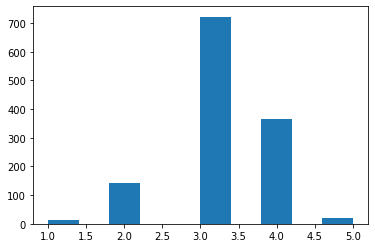

In [34]:
_ = plt.hist(data['looks'])
plt.show()

#### В группах looks=1 и looks=5 слишком мало наблюдений. Превратим признак looks в категориальный и закодируем с помощью фиктивных переменных:


In [35]:
data['below_avg'] = data['looks'].apply(lambda x: 1 if x < 3 else 0)
data['above_avg'] = data['looks'].apply(lambda x: 1 if x > 3 else 0)
looks = data.looks.copy()
data.drop(columns='looks', inplace=True)

data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,below_avg,above_avg
0,5.73,30,0,1,0,1,1,1,14,0,1
1,4.28,28,0,1,0,1,1,0,12,0,0
2,7.96,35,0,1,0,1,0,0,10,0,1
3,11.57,38,0,1,0,0,1,1,16,0,0
4,11.42,27,0,1,0,0,1,0,16,0,0


#### Распределение значений отклика:

/home/hp/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


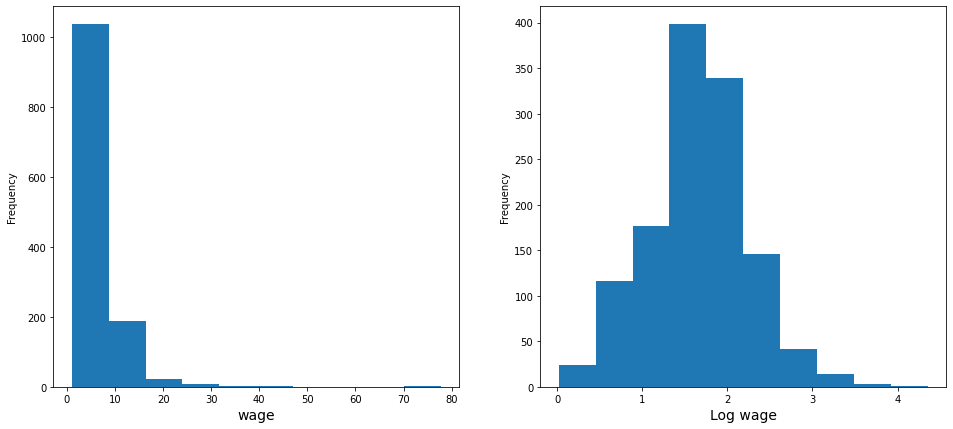

In [38]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
data['wage '].plot.hist()
plt.xlabel('wage', fontsize=14)

plt.subplot(122)
np.log(data['wage ']).plot.hist()
plt.xlabel('Log wage', fontsize=14)
plt.show()

#### Уберем выброс

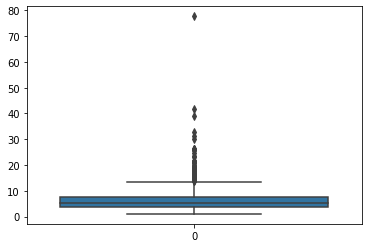

In [39]:
sns.boxplot(data=data['wage '])
plt.show()

In [40]:
data = data[data['wage '] < 70]

### Модель 0: Линейная регрессия зарплаты от всех признаков

In [41]:
feat_names = [f for f in data.columns if f not in ['wage ']]
features = data[feat_names]
formula0 = ' '.join(['wage ~', 
                    ' + '.join([f for f in feat_names])])
formula0

'wage ~ exper + union + goodhlth + black + female + married + service + educ + below_avg + above_avg'

In [42]:
data = data.rename(columns=dict(
    zip(data.columns, list(
        map(lambda x: x if x != 'wage ' else 'wage', data.columns)))))

In [43]:
model0 = sm.OLS.from_formula(formula0, data).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     44.31
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.42e-75
Time:                        14:39:16   Log-Likelihood:                -3402.9
No. Observations:                1259   AIC:                             6828.
Df Residuals:                    1248   BIC:                             6884.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5898      0.743     -0.793      0.428      -2.048       0.869
exper          0.0850      0.009      9.118      0.000       0.067       0.103
union          0.4786      0.234      2.048      0.041       0.020       0.937
goodhlth      -0.0444      0.417     -0.107      0.915      -0.862       0.773
black         -0.6748      0.403     -1.674      0.094      -1.466       0.116
female        -2.3058      0.242     -9.522      0.000      -2.781      -1.831
married        0.4569      0.240      1.905      0.057      -0.014       0.927
service       -0.7303      0.252     -2.896      0.004      -1.225      -0.236
educ           0.4820      0.043     11.272      0.000       0.398       0.566
below_avg     -0.8185      0.323     -2.532      0.011      -1.453      -0.184
above_avg     -0.0729      0.234     -0.311      0.756      -0.532       0.387
==============================================================================
Omnibus:                      898.031   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17969.693
Skew:                           3.076   Prob(JB):                         0.00
Kurtosis:                      20.456   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Проанализируем ошибки

/home/hp/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


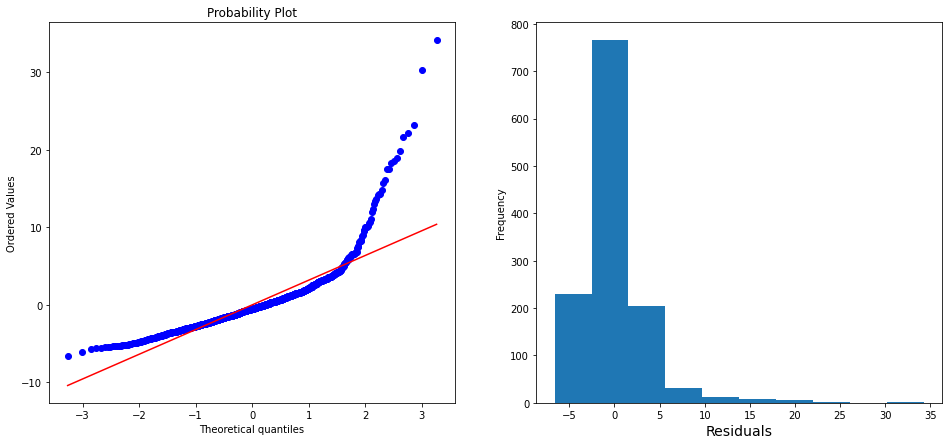

In [44]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
st.probplot(model0.resid, plot=plt)

plt.subplot(122)
model0.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

##### Бокса-Кокс

In [45]:
max(data['wage']) / min(data['wage'])

40.85294117647059

$\frac{max y}{min y} \approx 40>10$, можем воспользоваться боксом коксом.

Возьмём $λ=0$, то есть, будем строить регрессию логарифма отклика.

In [46]:
log_wage = st.boxcox(data['wage'], 0)
old_columns = list(data.columns)
data1 = data.copy()
data1['log_wage'] = log_wage

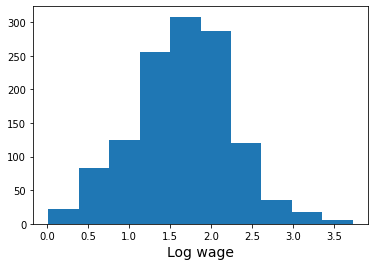

In [47]:
plt.hist(log_wage)
plt.xlabel('Log wage', fontsize=14)
plt.show()

### Модель 1: зависимости логарифма заработка по всем признакам

In [48]:
features = data1[feat_names]
formula1 = ' '.join(['log_wage ~', 
                    ' + '.join([f for f in feat_names])])
print(formula1)

log_wage ~ exper + union + goodhlth + black + female + married + service + educ + below_avg + above_avg


In [49]:
model1 = sm.OLS.from_formula(formula1, data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     77.63
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          1.18e-123
Time:                        14:40:25   Log-Likelihood:                -816.90
No. Observations:                1259   AIC:                             1656.
Df Residuals:                    1248   BIC:                             1712.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4515      0.095      4.737      0.000       0.265       0.639
exper          0.0138      0.001     11.546      0.000       0.011       0.016
union          0.1785      0.030      5.957      0.000       0.120       0.237
goodhlth       0.0785      0.053      1.470      0.142      -0.026       0.183
black         -0.0989      0.052     -1.913      0.056      -0.200       0.003
female        -0.3938      0.031    -12.684      0.000      -0.455      -0.333
married        0.0425      0.031      1.383      0.167      -0.018       0.103
service       -0.1505      0.032     -4.656      0.000      -0.214      -0.087
educ           0.0799      0.005     14.581      0.000       0.069       0.091
below_avg     -0.1305      0.041     -3.148      0.002      -0.212      -0.049
above_avg     -0.0041      0.030     -0.138      0.890      -0.063       0.055
==============================================================================
Omnibus:                       27.318   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.550
Skew:                           0.159   Prob(JB):                     7.80e-11
Kurtosis:                       3.887   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/hp/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


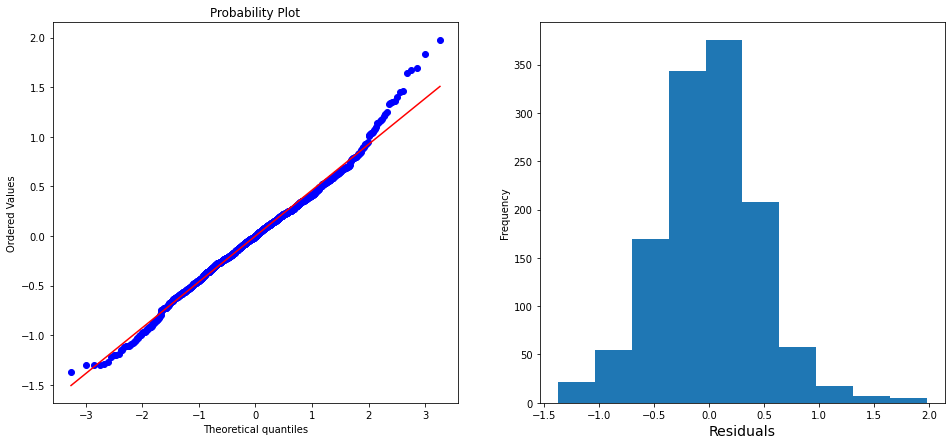

In [50]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
st.probplot(model1.resid, plot=plt)

plt.subplot(122)
model1.resid.plot.hist()
_ = plt.xlabel('Residuals', fontsize=14)
plt.show()

#### Проверка гипотез по остаткам

In [51]:
print(f'Нормальность ошибок: {st.shapiro(model1.resid)}')
print(f'Равенство распределений: {st.wilcoxon(model1.resid)}')
print(f'Гомоскедастичность: {het_breuschpagan(model1.resid, features)}')

Нормальность ошибок: ShapiroResult(statistic=0.9912799000740051, pvalue=8.536291034033638e-07)
Равенство распределений: WilcoxonResult(statistic=395640.0, pvalue=0.9416182399295813)
Гомоскедастичность: (330.28970216940695, 9.652316458420608e-66, 44.41986257428574, 9.275385503769242e-76)


#### Рассмотрим зависимость от опыта и образования (самое очевидное)

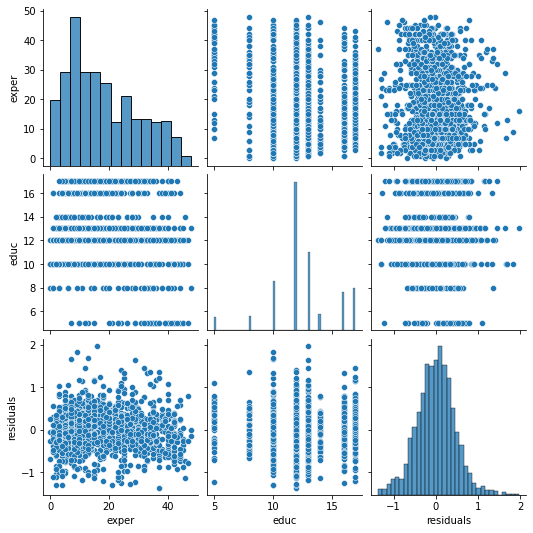

In [52]:
_ = sns.pairplot(pd.DataFrame({
    'exper': features['exper'], 
    'educ': features['educ'], 
    'residuals': model1.resid
}))

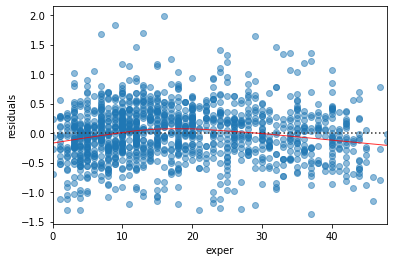

In [53]:
sns.residplot(x=features['exper'], 
              y=model1.resid,
              lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
_ = plt.ylabel('residuals')

### Модель 2: добавим в модель 1 квадрат опыта работы

In [54]:
exper2 = features['exper']**2
old_columns = list(data1.columns)
data2 = data1.copy()
data2['exper2'] = exper2
data2.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,below_avg,above_avg,log_wage,exper2
0,5.73,30,0,1,0,1,1,1,14,0,1,1.745716,900
1,4.28,28,0,1,0,1,1,0,12,0,0,1.453953,784
2,7.96,35,0,1,0,1,0,0,10,0,1,2.074429,1225
3,11.57,38,0,1,0,0,1,1,16,0,0,2.448416,1444
4,11.42,27,0,1,0,0,1,0,16,0,0,2.435366,729


In [55]:
feat_names += ['exper2']

In [56]:
features = data2[feat_names]
formula2 = ' '.join(['log_wage ~', 
                    ' + '.join([f for f in feat_names])])
print(formula2)

log_wage ~ exper + union + goodhlth + black + female + married + service + educ + below_avg + above_avg + exper2


In [57]:
model2 = sm.OLS.from_formula(formula2, data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     76.46
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          3.19e-131
Time:                        14:41:44   Log-Likelihood:                -796.86
No. Observations:                1259   AIC:                             1618.
Df Residuals:                    1247   BIC:                             1679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3424      0.095      3.588      0.000       0.155       0.530
exper          0.0404      0.004      9.290      0.000       0.032       0.049
union          0.1710      0.030      5.793      0.000       0.113       0.229
goodhlth       0.0716      0.053      1.361      0.174      -0.032       0.175
black         -0.0831      0.051     -1.631      0.103      -0.183       0.017
female        -0.3936      0.031    -12.875      0.000      -0.454      -0.334
married        0.0101      0.031      0.329      0.742      -0.050       0.070
service       -0.1599      0.032     -5.018      0.000      -0.222      -0.097
educ           0.0758      0.005     13.941      0.000       0.065       0.086
below_avg     -0.1352      0.041     -3.313      0.001      -0.215      -0.055
above_avg     -0.0025      0.030     -0.084      0.933      -0.061       0.056
exper2        -0.0006   9.63e-05     -6.351      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       30.019   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.257
Skew:                           0.140   Prob(JB):                     6.08e-13
Kurtosis:                       3.997   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/home/hp/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


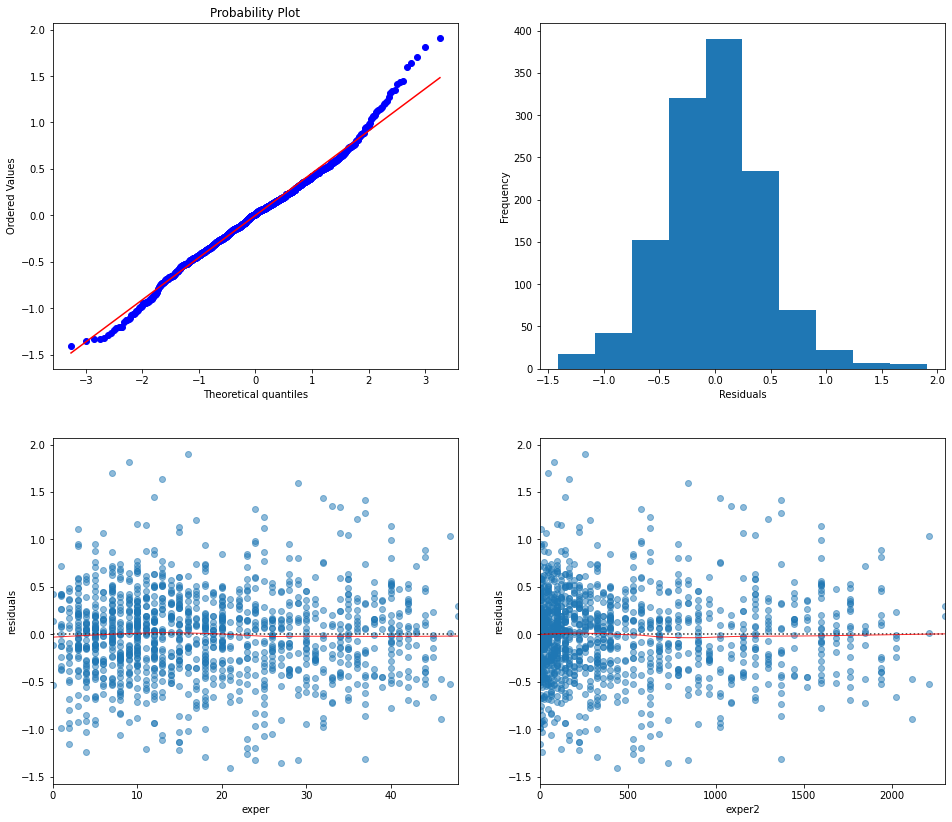

In [58]:
gridsize = (2, 2)
fig = plt.figure(figsize=(16, 14))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 0))
ax4 = plt.subplot2grid(gridsize, (1, 1))
st.probplot(model2.resid, plot=ax1)

model2.resid.plot.hist(ax=ax2)
ax2.set_xlabel('Residuals')

sns.residplot(x=features['exper'], 
              y=model2.resid,
              lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax3)
ax3.set_ylabel('residuals')
sns.residplot(x=features['exper2'], 
              y=model2.resid,
              lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax4)
_ = ax4.set_ylabel('residuals')

plt.show()

#### Проверка гипотез по остаткам

In [59]:
print(f'Нормальность ошибок: {st.shapiro(model2.resid)}')
print(f'Равенство распределений: {st.wilcoxon(model2.resid)}')
print(f'Гомоскедастичность: {het_breuschpagan(model2.resid, features)}')

Нормальность ошибок: ShapiroResult(statistic=0.9899681210517883, pvalue=1.4064468700780708e-07)
Равенство распределений: WilcoxonResult(statistic=395967.0, pvalue=0.9618006539573611)
Гомоскедастичность: (328.73324109726155, 1.288723954013739e-64, 40.09202746154311, 1.768759927539838e-74)


Незначимые признаки: `goodhlth`, `black`, `married`, `above_avg`. Прежде, чем удалять лишние признаки, проверим, не входят ли они в значимые попарные взаимодействия:

In [66]:
for f1 in range(len(feat_names)):
    for f2 in range(f1 + 1, len(feat_names)):
        formula.append(feat_names[f1] + ':' + feat_names[f2])
formula = ' + '.join(formula)
formula

AttributeError: 'str' object has no attribute 'append'

In [ ]:
model_all = sm.OLS.from_formula(formula, data2).fit()

anova = sm.stats.anova_lm(model_all)
bad_names = []
for id, p in enumerate(anova['PR(>F)']):
    if p < 0.05:
        print(anova.iloc[id].name, p)
    else:
        bad_names.append(anova.iloc[id].name)

In [ ]:
_ = sns.pairplot(pd.DataFrame({
    'exper': features['exper'], 
    'exper2': features['exper2'],
    'educ': features['educ'], 
    'residuals': model_all.resid
}))

In [ ]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
_ = st.probplot(model_all.resid, plot=plt)

plt.subplot(122)
_ = st.probplot(model2.resid, plot=plt)
plt.show()

### Модель 3: удалим из модели 2 незначимые признаки (`goodhlth`, `black`, `married`) и добавим межфакторное взаимодействие пола и опыта работы, при этом оставим `above_avg`, так как мы хотим оценить влияние внешней привлекательности на зарплату

In [ ]:
bad_feats = ['goodhlth', 'black', 'married']
formula3 = ' '.join(['log_wage ~', 
                    ' + '.join([f for f in features if f not in bad_feats] + ['exper:female'])])
print(formula3)

In [ ]:
model3 = sm.OLS.from_formula(formula3, data=data2).fit()
model3.summary()

#### Проверка гипотез по остаткам

In [ ]:
print('Model 3')
print(st.shapiro(model3.resid))
print(st.wilcoxon(model3.resid))
print('Model 2')
print(st.shapiro(model2.resid))
print(st.wilcoxon(model2.resid))

In [ ]:
_ = sns.pairplot(pd.DataFrame({
    'exper': features['exper'], 
    'educ': features['educ'], 
    'residuals': model3.resid
}))

In [ ]:
st.probplot(model3.resid, plot=plt)
plt.show()

In [ ]:
model2.compare_lr_test(model3), model2.compare_f_test(model3)

### Модель 4: попробуем оставить в модели 2 цвет кожи и семейное положение, чтобы добавить их взаимодействия с полом. Как и в модели 3, добавим взаимодействие пола с опытом работы, а состояние здоровья удалим.

In [ ]:
bad_feats = ['goodhlth']
add_feats = ['exper:female', 'black:female', 'married:female']
formula4 = ' '.join(['log_wage ~', 
                    ' + '.join([f for f in features if f not in bad_feats] + add_feats)])
print(formula4)

In [ ]:
model4 = sm.OLS.from_formula(formula4, data=data2).fit()
model4.summary()

#### Проверка гипотез по остаткам

In [ ]:
print(st.shapiro(model4.resid))
print(st.wilcoxon(model4.resid))

In [ ]:
_ = sns.pairplot(pd.DataFrame({
    'exper': features['exper'], 
    'looks': looks,
    'residuals': model4.resid
}))
plt.show()

In [ ]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
_ = st.probplot(model4.resid, plot=plt)

plt.subplot(122)
_ = st.probplot(model3.resid, plot=plt)
plt.show()

### Модель 5: в предыдущей модели семейное положение незначимо; посмотрим, можно ли удалить его

In [ ]:
bad_feats = ['goodhlth', 'married']
add_feats = ['exper:female', 'black:female', 'married:female']
formula5 = ' '.join(['log_wage ~', 
                    ' + '.join([f for f in features if f not in bad_feats] + add_feats)])
print(formula5)

In [ ]:
model5 = sm.OLS.from_formula(formula5, data=data2).fit()
model5.summary()

#### Проверка гипотез по остаткам

In [ ]:
print('Model 5')
print(st.shapiro(model5.resid))
print(st.wilcoxon(model5.resid))

print('Model 4')
print(st.shapiro(model4.resid))
print(st.wilcoxon(model4.resid))

In [ ]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
_ = st.probplot(model4.resid, plot=plt)

plt.subplot(122)
_ = st.probplot(model5.resid, plot=plt)
plt.show()

##### Модель 5 по остаткам немного хуже

### Расстояние Кука
Посмотрим на влиятельные наблюдения: 
    

In [ ]:
cook = model4.get_influence().summary_frame().loc[:,'cooks_d']

In [ ]:
plt.scatter(data2['log_wage'], cook)
plt.xlim((0,4))
plt.ylim((-0.01, 0.05))
plt.show()

In [ ]:
data3 = data2[cook < 0.015]
data3.shape

In [ ]:
model6 = sm.OLS.from_formula(formula4, data=data3).fit()
model6.summary()

#### Проверка нормальности остатков

In [ ]:
print(st.shapiro(model6.resid))
print(st.shapiro(model4.resid))

In [ ]:
plt.figure(figsize=(16, 7))

plt.subplot(121)
plt.scatter(np.exp(model6.predict(data3)), data3['wage'])
plt.xlabel('wage', fontsize=14)
plt.ylabel('exp(predictions)', fontsize=14)

plt.subplot(122)
plt.scatter(model6.predict(data3), data3['log_wage'])
plt.xlabel('log wage', fontsize=14)
_ = plt.ylabel('predictions', fontsize=14)
plt.show()

### Итого

- Итоговая модель (№6) объясняет 43% вариации логарифма отклика
- Коэффициент при `below_avg`: -0.13 => человек, привлекательность которого ниже среднего, получает зарплату на 13% ниже, в среднем ($p=0.001$, 95%-й доверительный интервал: \[5,21\]%)
- Коэффициент при `above_avg`: -0.042 => человек, привлекательность которого выше среднего, примерно такую же, сколько и люди со средним уровнем привлекательности ($p =  0.884$, 95%-й доверительный интервал: \[-6, 6\]%), признак неинформативен